# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from ddpg_agent import Agent
import torch
from collections import deque

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Visualize the environment info

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Training the agent with DDPG

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- Due to connection failed to the workspace occurs frequently, it is highly recommended  to so save the weights of the agent during training epsidode and then set the ```resume_path=True``` to contiune training.
- scores_deque is used to calculate the average score of 100 continuous episode

In [4]:
# traing paramenter
n_episodes = 10000
print_every = 100
scores_deque = deque(maxlen=print_every)
scores_final = []
agent = Agent(state_size, action_size, num_agents, random_seed=2,resume_path=True)
# ----------------------- training the agents ----------------------- #
for i_episode in range(1, n_episodes):
    env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
    states = env_info.vector_observations  # get the current state (for each agent)
    scores = np.zeros(num_agents)  # initialize the score (for each agent)
    while True:
        actions = agent.act(states)  # select an action (for each agent)
        env_info = env.step(actions)[brain_name]  # send all actions to tne environment
        next_states = env_info.vector_observations  # get next state (for each agent) next_states shape:(2,24)
        rewards = env_info.rewards  # get reward (for each agent)
        dones = env_info.local_done  # see if episode finished
        agent.step(states, actions, rewards, next_states, dones)
        scores += env_info.rewards  # update the score (for each agent)
        states = next_states  # roll over states to next time step
        if np.any(dones):  # exit loop if episode finished
            break
    scores_deque.append(max(scores))
    scores_final.append(scores)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)), end="")
    if i_episode % 100 == 0:
        print('\r Total score (averaged over agents) this episode: {:.3f}'.format(np.mean(scores_deque)))
    if np.mean(scores_deque)> 0.5:
        torch.save(agent.actor_local.state_dict(), './checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), './checkpoint_critic.pth')
        break
    if i_episode % 300 == 0:
        torch.save(agent.actor_local.state_dict(), './checkpoint_actor_temp.pth')
        torch.save(agent.critic_local.state_dict(), './checkpoint_critic_temp.pth')
        


 Total score (averaged over agents) this episode: 0.182
 Total score (averaged over agents) this episode: 0.196
 Total score (averaged over agents) this episode: 0.163
 Total score (averaged over agents) this episode: 0.228
 Total score (averaged over agents) this episode: 0.224
 Total score (averaged over agents) this episode: 0.268
 Total score (averaged over agents) this episode: 0.274
 Total score (averaged over agents) this episode: 0.369
 Total score (averaged over agents) this episode: 0.417
 Total score (averaged over agents) this episode: 0.527



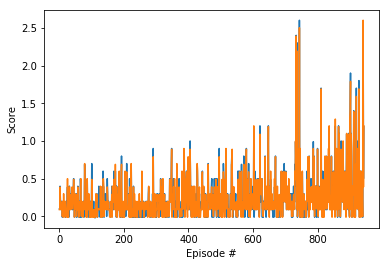

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_final)+1), scores_final)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Question

in unity environment info, Number of stacked Vector Observation: 3  
Q:given 2 agent,why there 3 Vector Observation?